In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import glob
import warnings
import numpy as np
warnings.filterwarnings('ignore')


In [2]:

all_files = glob.glob("Data/*.csv")
df = pd.concat((pd.read_csv(f,sep=';') for f in all_files))
df.index = pd.to_datetime(df.index)
df

,timestamp,customer_no,location
1970-01-01 00:00:00.000000000,2019-09-03 07:02:00,1,fruit
1970-01-01 00:00:00.000000001,2019-09-03 07:02:00,2,drinks
1970-01-01 00:00:00.000000002,2019-09-03 07:03:00,3,dairy
1970-01-01 00:00:00.000000003,2019-09-03 07:05:00,1,drinks
1970-01-01 00:00:00.000000004,2019-09-03 07:06:00,4,dairy
...,...,...,...
1970-01-01 00:00:00.000005120,2019-09-06 21:50:00,1500,dairy
1970-01-01 00:00:00.000005121,2019-09-06 21:50:00,1507,checkout
1970-01-01 00:00:00.000005122,2019-09-06 21:50:00,1508,checkout
1970-01-01 00:00:00.000005123,2019-09-06 21:50:00,1509,drinks


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 24877 entries, 1970-01-01 00:00:00 to 1970-01-01 00:00:00.000005124
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   timestamp    24877 non-null  object
 1   customer_no  24877 non-null  int64 
 2   location     24877 non-null  object
dtypes: int64(1), object(2)
memory usage: 777.4+ KB


In [4]:
df['timestamp']=pd.to_datetime(df['timestamp'])
df['year']= df['timestamp'].dt.year
df['month']= df['timestamp'].dt.month
df['week']= df['timestamp'].dt.week
df['weekday']= df['timestamp'].dt.weekday
df['day']= df['timestamp'].dt.day
df['hour']= df['timestamp'].dt.hour
df['minutes']= df['timestamp'].dt.minute
df['seconds']= df['timestamp'].dt.second


df.loc[df["weekday"] == 0, "weekday"] = 'monday'
df.loc[df["weekday"] == 1, "weekday"] = 'tuesday'
df.loc[df["weekday"] == 2, "weekday"] = 'wednesday'
df.loc[df["weekday"] == 3, "weekday"] = 'thursday'
df.loc[df["weekday"] == 4, "weekday"] = 'friday'

df = df.sort_values(['timestamp'])

In [5]:
df

,timestamp,customer_no,location,year,month,week,weekday,day,hour,minutes,seconds
1970-01-01 00:00:00.000000001,2019-09-02 07:03:00,2,dairy,2019,9,36,monday,2,7,3,0
1970-01-01 00:00:00.000000000,2019-09-02 07:03:00,1,dairy,2019,9,36,monday,2,7,3,0
1970-01-01 00:00:00.000000002,2019-09-02 07:04:00,3,dairy,2019,9,36,monday,2,7,4,0
1970-01-01 00:00:00.000000007,2019-09-02 07:04:00,8,fruit,2019,9,36,monday,2,7,4,0
1970-01-01 00:00:00.000000003,2019-09-02 07:04:00,4,dairy,2019,9,36,monday,2,7,4,0
...,...,...,...,...,...,...,...,...,...,...,...
1970-01-01 00:00:00.000005121,2019-09-06 21:50:00,1507,checkout,2019,9,36,friday,6,21,50,0
1970-01-01 00:00:00.000005123,2019-09-06 21:50:00,1509,drinks,2019,9,36,friday,6,21,50,0
1970-01-01 00:00:00.000005119,2019-09-06 21:50:00,1496,fruit,2019,9,36,friday,6,21,50,0
1970-01-01 00:00:00.000005120,2019-09-06 21:50:00,1500,dairy,2019,9,36,friday,6,21,50,0


**Calculate the total number of customers in each section**

,timestamp,customer_no,year,month,week,weekday,day,hour,minutes,seconds
location,,,,,,,,,,
checkout,7417,7417,7417,7417,7417,7417,7417,7417,7417,7417
dairy,4679,4679,4679,4679,4679,4679,4679,4679,4679,4679
drinks,3905,3905,3905,3905,3905,3905,3905,3905,3905,3905
fruit,5122,5122,5122,5122,5122,5122,5122,5122,5122,5122
spices,3754,3754,3754,3754,3754,3754,3754,3754,3754,3754


In [6]:
total_customers = pd.DataFrame(df.groupby(['timestamp','location','weekday'])['customer_no'].count()).reset_index()

In [7]:
total_customers

,timestamp,location,weekday,customer_no
0,2019-09-02 07:03:00,dairy,monday,2
1,2019-09-02 07:04:00,dairy,monday,2
2,2019-09-02 07:04:00,fruit,monday,1
3,2019-09-02 07:04:00,spices,monday,3
4,2019-09-02 07:05:00,checkout,monday,2
...,...,...,...,...
13834,2019-09-06 21:50:00,checkout,friday,2
13835,2019-09-06 21:50:00,dairy,friday,1
13836,2019-09-06 21:50:00,drinks,friday,1
13837,2019-09-06 21:50:00,fruit,friday,1


In [182]:
import plotly.express as px
fig = px.sunburst(total_customers, path=['location','weekday'], values='customer_no',height=800)
fig.show()

<AxesSubplot:ylabel='location'>

<Figure size 1440x720 with 0 Axes>

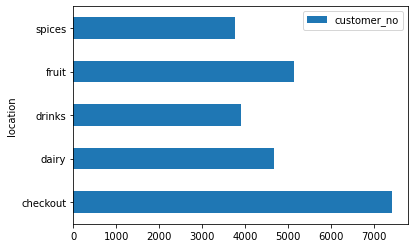

In [196]:
plt.figure(figsize=(20,10))
total_customers_location=pd.DataFrame(df.groupby('location')['customer_no'].count())
total_customers_location.plot(kind='barh',ylabel='number of customers')


In [9]:
df.weekday.unique()

array(['monday', 'tuesday', 'wednesday', 'thursday', 'friday'],
      dtype=object)

**Calculate the total number of customers in each section over time**

In [35]:
df_unstack = df.groupby('timestamp')['location'].value_counts().unstack().fillna(0)
df_unstack

location,checkout,dairy,drinks,fruit,spices
timestamp,,,,,
2019-09-02 07:03:00,0.0,2.0,0.0,0.0,0.0
2019-09-02 07:04:00,0.0,2.0,0.0,1.0,3.0
2019-09-02 07:05:00,2.0,1.0,1.0,0.0,0.0
2019-09-02 07:06:00,2.0,2.0,1.0,2.0,1.0
2019-09-02 07:07:00,1.0,1.0,1.0,0.0,1.0
...,...,...,...,...,...
2019-09-06 21:46:00,0.0,0.0,1.0,4.0,0.0
2019-09-06 21:47:00,2.0,1.0,0.0,1.0,0.0
2019-09-06 21:48:00,2.0,3.0,0.0,2.0,0.0


In [197]:
customers_per_time=pd.DataFrame(df.groupby(['timestamp','location','weekday','hour'])
                                                 ['customer_no'].count()).reset_index()
customers_per_time.head(10)

,timestamp,location,weekday,hour,customer_no
0,2019-09-02 07:03:00,dairy,monday,7,2
1,2019-09-02 07:04:00,dairy,monday,7,2
2,2019-09-02 07:04:00,fruit,monday,7,1
3,2019-09-02 07:04:00,spices,monday,7,3
4,2019-09-02 07:05:00,checkout,monday,7,2
5,2019-09-02 07:05:00,dairy,monday,7,1
6,2019-09-02 07:05:00,drinks,monday,7,1
7,2019-09-02 07:06:00,checkout,monday,7,2
8,2019-09-02 07:06:00,dairy,monday,7,2
9,2019-09-02 07:06:00,drinks,monday,7,1


[Text(0.5, 1.0, 'total number of customers in each section over time')]

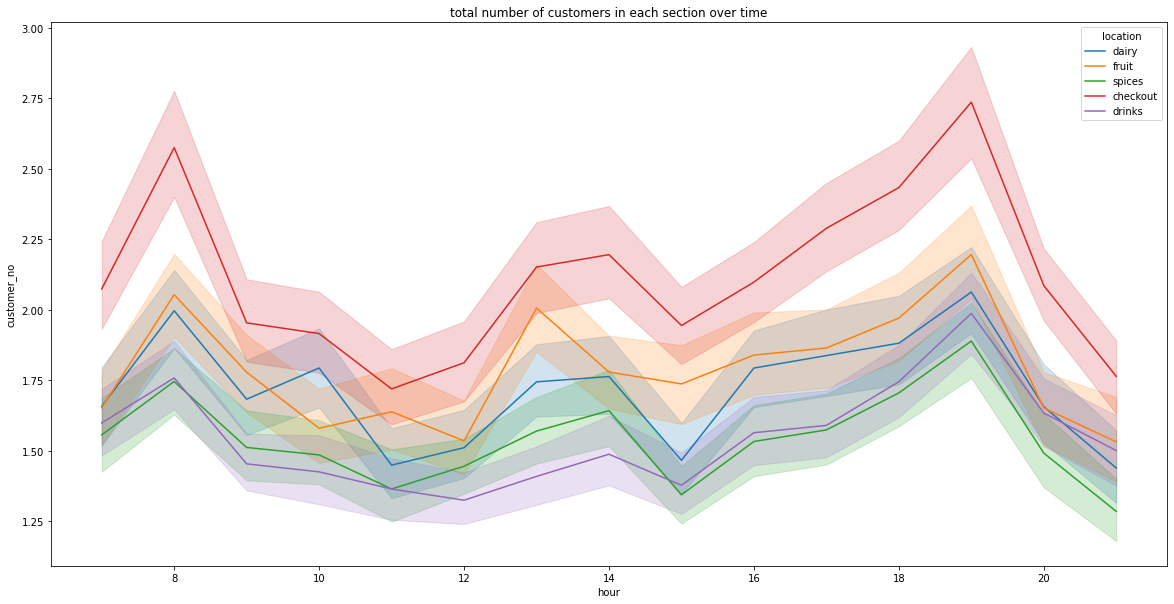

In [166]:
plt.figure(figsize=(20,10))
sns.lineplot(data=customers_per_time,x=customers_per_time['hour'],
              y=customers_per_time['customer_no'],
              hue=customers_per_time['location']).set(title='total number of customers in each section over time')

**Display the number of customers at checkout over time**

In [12]:
customer_at_checkout=customers_per_time[customers_per_time['location']=='checkout']
customer_at_checkout

,location,weekday,hour,customer_no
0,checkout,friday,7,87
1,checkout,friday,8,132
2,checkout,friday,9,82
3,checkout,friday,10,80
4,checkout,friday,11,79
...,...,...,...,...
70,checkout,wednesday,17,98
71,checkout,wednesday,18,97
72,checkout,wednesday,19,192
73,checkout,wednesday,20,85


[Text(0.5, 1.0, 'number of customers at checkout over time')]

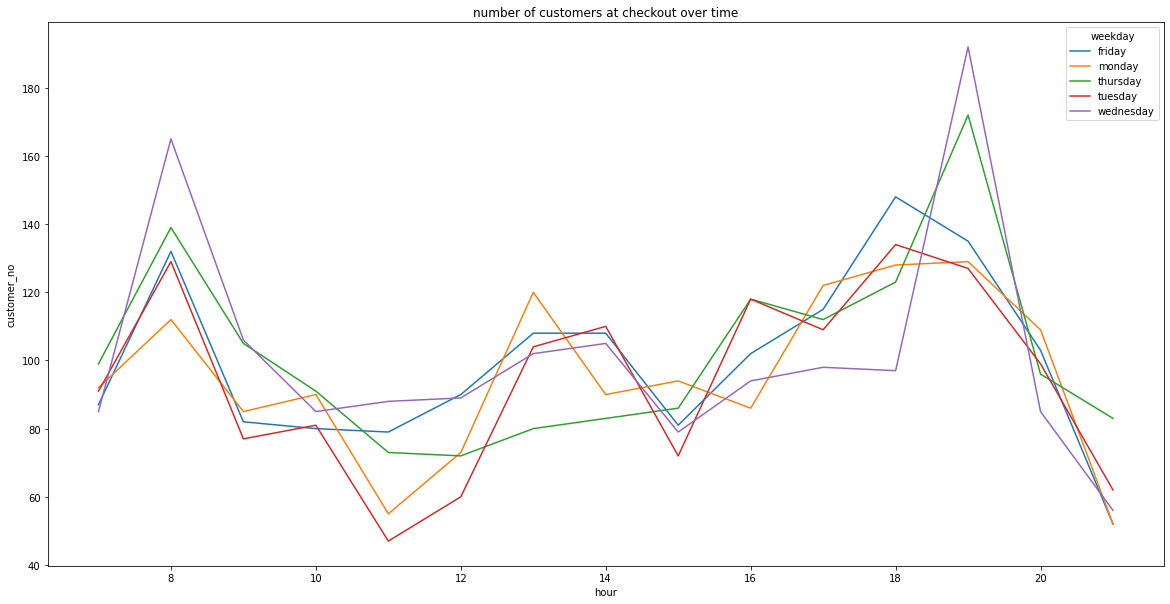

In [13]:
plt.figure(figsize=(20,10))
sns.lineplot(data=customer_at_checkout,x=customer_at_checkout['hour'],
              y=customer_at_checkout['customer_no'],
              hue=customer_at_checkout['weekday']).set(title='number of customers at checkout over time')


**Calculate the time each customer spent in the market**

In [14]:
df1=df[['timestamp','weekday','hour','location','customer_no']]
df1['uniqueID']=df['weekday']+df['customer_no'].astype(str)
#df1 = df1.sort_values(['customer_no', 'timestamp']).reset_index()
#df1['timespent'] = df1.groupby('customer_no')['timestamp'].diff().reset_index()

In [59]:
df1 = df1.sort_values(['customer_no','timestamp']).reset_index()
df1['timespent'] = df1.groupby('uniqueID')['timestamp'].diff()

In [60]:
df1=pd.DataFrame(df1)

In [61]:
df1

,level_0,index,timestamp,weekday,hour,location,customer_no,uniqueID,timespent
0,0,1970-01-01 00:00:00.000000000,2019-09-02 07:03:00,monday,7,dairy,1,monday1,NaT
1,1,1970-01-01 00:00:00.000000008,2019-09-02 07:05:00,monday,7,checkout,1,monday1,0 days 00:02:00
2,2,1970-01-01 00:00:00.000000000,2019-09-03 07:02:00,tuesday,7,fruit,1,tuesday1,NaT
3,3,1970-01-01 00:00:00.000000003,2019-09-03 07:05:00,tuesday,7,drinks,1,tuesday1,0 days 00:03:00
4,4,1970-01-01 00:00:00.000000025,2019-09-03 07:12:00,tuesday,7,checkout,1,tuesday1,0 days 00:07:00
...,...,...,...,...,...,...,...,...,...
24872,24872,1970-01-01 00:00:00.000005099,2019-09-05 21:48:00,thursday,21,dairy,1533,thursday1533,NaT
24873,24873,1970-01-01 00:00:00.000005100,2019-09-05 21:48:00,thursday,21,fruit,1534,thursday1534,NaT
24874,24874,1970-01-01 00:00:00.000005102,2019-09-05 21:49:00,thursday,21,checkout,1534,thursday1534,0 days 00:01:00
24875,24875,1970-01-01 00:00:00.000005101,2019-09-05 21:48:00,thursday,21,spices,1535,thursday1535,NaT


In [62]:
df1['uniqueID'].unique()

array(['monday1', 'tuesday1', 'wednesday1', ..., 'thursday1533',
       'thursday1534', 'thursday1535'], dtype=object)

In [63]:
df1[df1['uniqueID']=='friday2']

,level_0,index,timestamp,weekday,hour,location,customer_no,uniqueID,timespent
22,22,1970-01-01 00:00:00.000000001,2019-09-06 07:00:00,friday,7,drinks,2,friday2,NaT
23,23,1970-01-01 00:00:00.000000003,2019-09-06 07:01:00,friday,7,checkout,2,friday2,0 days 00:01:00


In [64]:
time_spent_in_market= df1.groupby(['weekday','uniqueID'])['timestamp'].apply(lambda x: x.max() - x.min()).dt.seconds/60
time_spent_in_market=pd.DataFrame(time_spent_in_market).reset_index()
time_spent_in_market

,weekday,uniqueID,timestamp
0,friday,friday1,5.0
1,friday,friday10,5.0
2,friday,friday100,1.0
3,friday,friday1000,1.0
4,friday,friday1001,10.0
...,...,...,...
7440,wednesday,wednesday995,28.0
7441,wednesday,wednesday996,11.0
7442,wednesday,wednesday997,22.0
7443,wednesday,wednesday998,6.0


In [23]:
time_spent_in_market[time_spent_in_market['uniqueID']=='monday1']

,weekday,uniqueID,timestamp
1510,monday,monday1,2.0


**Calculate the total number of customers in the supermarket over time.**

In [24]:
dff=df[['year','month','week','weekday','hour','minutes','customer_no']]
dff['uniqueID']=df['weekday']+df['customer_no'].astype(str)
dff.drop_duplicates(subset='uniqueID', keep="last",inplace=True)

In [25]:
dff['totalcustomers'] = np.where(dff.uniqueID.is_unique,dff.uniqueID.is_unique,1)

In [26]:
dff.reset_index()

,index,year,month,week,weekday,hour,minutes,customer_no,uniqueID,totalcustomers
0,1970-01-01 00:00:00.000000008,2019,9,36,monday,7,5,1,monday1,1
1,1970-01-01 00:00:00.000000009,2019,9,36,monday,7,5,5,monday5,1
2,1970-01-01 00:00:00.000000013,2019,9,36,monday,7,6,3,monday3,1
3,1970-01-01 00:00:00.000000012,2019,9,36,monday,7,6,2,monday2,1
4,1970-01-01 00:00:00.000000020,2019,9,36,monday,7,7,8,monday8,1
...,...,...,...,...,...,...,...,...,...,...
7440,1970-01-01 00:00:00.000005121,2019,9,36,friday,21,50,1507,friday1507,1
7441,1970-01-01 00:00:00.000005123,2019,9,36,friday,21,50,1509,friday1509,1
7442,1970-01-01 00:00:00.000005119,2019,9,36,friday,21,50,1496,friday1496,1
7443,1970-01-01 00:00:00.000005120,2019,9,36,friday,21,50,1500,friday1500,1


In [27]:
fig = px.sunburst(dff, path=['year','month','week','weekday','hour'], values='totalcustomers',height=800)
fig.show()

**Markov Chain Monte Carlo Simulation (MCMC) 🎲**

In [163]:
dt=df[['timestamp','weekday','hour','customer_no','location']]
dt['uniqueID']=df['weekday']+df['customer_no'].astype(str)
dt = dt.sort_values(['customer_no','timestamp'])
dt.groupby('uniqueID')
dt = dt.reindex(columns=['timestamp','weekday','hour','customer_no','uniqueID','location'])
dt=dt.set_index('timestamp')
dt['newlocation']=dt['location'].shift(-1).bfill()
dt

,weekday,hour,customer_no,uniqueID,location,newlocation
timestamp,,,,,,
2019-09-02 07:03:00,monday,7,1,monday1,dairy,checkout
2019-09-02 07:05:00,monday,7,1,monday1,checkout,fruit
2019-09-03 07:02:00,tuesday,7,1,tuesday1,fruit,drinks
2019-09-03 07:05:00,tuesday,7,1,tuesday1,drinks,checkout
2019-09-03 07:12:00,tuesday,7,1,tuesday1,checkout,fruit
...,...,...,...,...,...,...
2019-09-05 21:48:00,thursday,21,1533,thursday1533,dairy,fruit
2019-09-05 21:48:00,thursday,21,1534,thursday1534,fruit,checkout
2019-09-05 21:49:00,thursday,21,1534,thursday1534,checkout,spices


trans=dt.reset_index()
trans.drop(trans[trans.location =='checkout'].index, inplace=True)
trans


In [164]:
pd.crosstab(dt['location'],dt['newlocation'])

newlocation,checkout,dairy,drinks,fruit,spices
location,,,,,
checkout,0,2135,1133,2804,1344
dairy,1825,1,1046,889,918
drinks,2096,106,2,855,846
fruit,2555,1221,697,3,646
spices,941,1215,1027,571,0


In [119]:
dtt=df[['timestamp','weekday','hour','customer_no','location']]
dtt['uniqueID']=dtt['weekday']+dtt['customer_no'].astype(str)
dtt = dtt.sort_values(['uniqueID','timestamp'],ascending=True)
dtt = dtt.reindex(columns=['timestamp','weekday','hour','customer_no','uniqueID','location'])
dtt=dtt.set_index('timestamp')
dtt.resample

,weekday,hour,customer_no,uniqueID,location
timestamp,,,,,
2019-09-06 07:00:00,friday,7,1,friday1,dairy
2019-09-06 07:04:00,friday,7,1,friday1,spices
2019-09-06 07:05:00,friday,7,1,friday1,checkout
2019-09-06 07:06:00,friday,7,10,friday10,fruit
2019-09-06 07:11:00,friday,7,10,friday10,checkout
...,...,...,...,...,...
2019-09-04 16:53:00,wednesday,16,998,wednesday998,dairy
2019-09-04 16:57:00,wednesday,16,998,wednesday998,fruit
2019-09-04 16:59:00,wednesday,16,998,wednesday998,checkout


In [128]:
dtt_resampled=dtt.groupby('uniqueID').resample('1T').ffill()
dtt_resampled.drop(columns=['uniqueID'], inplace=True)
dtt_resampled


weekday  hour  customer_no  location
uniqueID     timestamp                                                  
friday1      2019-09-06 07:00:00     friday     7            1     dairy
             2019-09-06 07:01:00     friday     7            1     dairy
             2019-09-06 07:02:00     friday     7            1     dairy
             2019-09-06 07:03:00     friday     7            1     dairy
             2019-09-06 07:04:00     friday     7            1    spices
...                                     ...   ...          ...       ...
wednesday998 2019-09-04 16:57:00  wednesday    16          998     fruit
             2019-09-04 16:58:00  wednesday    16          998     fruit
             2019-09-04 16:59:00  wednesday    16          998  checkout
wednesday999 2019-09-04 16:53:00  wednesday    16          999     fruit
             2019-09-04 16:54:00  wednesday    16          999  checkout

[53903 rows x 4 columns]

In [130]:

dtt_resampled['next_location']= dtt_resampled.groupby('uniqueID')['location'].shift(-1)
dtt_resampled['next_location'].fillna(value='checkout', inplace=True)
dtt_resampled

weekday  hour  customer_no  location  \
uniqueID     timestamp                                                     
friday1      2019-09-06 07:00:00     friday     7            1     dairy   
             2019-09-06 07:01:00     friday     7            1     dairy   
             2019-09-06 07:02:00     friday     7            1     dairy   
             2019-09-06 07:03:00     friday     7            1     dairy   
             2019-09-06 07:04:00     friday     7            1    spices   
...                                     ...   ...          ...       ...   
wednesday998 2019-09-04 16:57:00  wednesday    16          998     fruit   
             2019-09-04 16:58:00  wednesday    16          998     fruit   
             2019-09-04 16:59:00  wednesday    16          998  checkout   
wednesday999 2019-09-04 16:53:00  wednesday    16          999     fruit   
             2019-09-04 16:54:00  wednesday    16          999  checkout   

                                 next_location  
uniqueID     timestamp                          
friday1      2019-09-06 07:00:00         dairy  
             2019-09-06 07:01:00         dairy  
             2019-09-06 07:02:00         dairy  
             2019-09-06 07:03:00        spices  
             2019-09-06 07:04:00      checkout  
...                                        ...  
wednesday998 2019-09-04 16:57:00         fruit  
             2019-09-04 16:58:00      checkout  
             2019-09-04 16:59:00      checkout  
wednesday999 2019-09-04 16:53:00      checkout  
             2019-09-04 16:54:00      checkout  

[53903 rows x 5 columns]

In [170]:
P=pd.crosstab(dtt_resampled['location'],dtt_resampled['next_location'], normalize=0)
P

next_location,checkout,dairy,drinks,fruit,spices
location,,,,,
checkout,1.000000,0.000000,0.000000,0.000000,0.000000
dairy,0.103466,0.736750,0.058569,0.049848,0.051367
drinks,0.215710,0.010899,0.598499,0.087909,0.086983
fruit,0.201605,0.095924,0.054847,0.596947,0.050677
spices,0.150685,0.193214,0.163109,0.090953,0.402039


<AxesSubplot:xlabel='next_location', ylabel='location'>

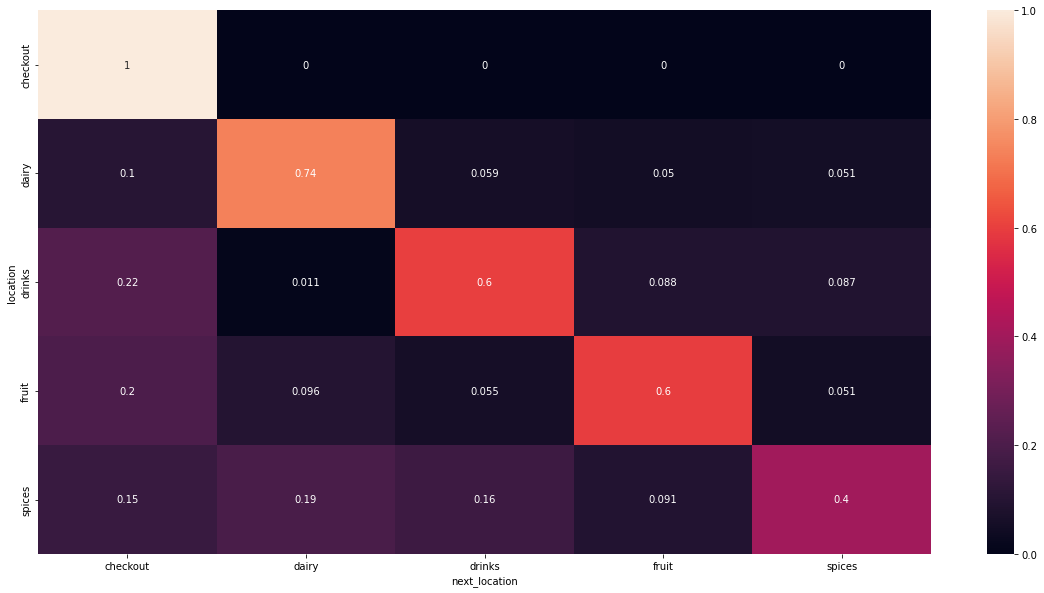

In [204]:
plt.figure(figsize=(20,10))
sns.heatmap(P,annot=True)

In [184]:
np.random.seed(42)
state= 'dairy'
sequence = []
for i in range(20):
    state = np.random.choice(['dairy','drinks','fruit','spices','checkout'], p=P.loc[state])
    sequence.append(state)

In [185]:
sequence

['drinks',
 'checkout',
 'dairy',
 'drinks',
 'dairy',
 'drinks',
 'dairy',
 'fruit',
 'spices',
 'checkout',
 'dairy',
 'checkout',
 'dairy',
 'drinks',
 'dairy',
 'drinks',
 'fruit',
 'spices',
 'fruit',
 'drinks']